In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gradient_descent as gd
from sklearn.model_selection import train_test_split

# Stochastic GD

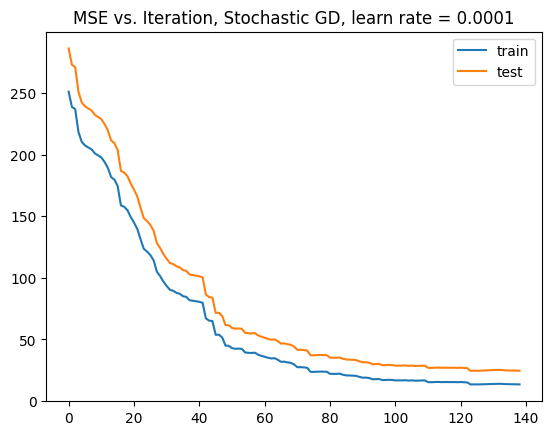

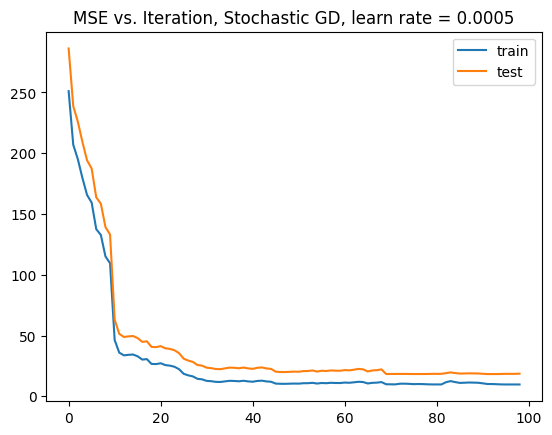

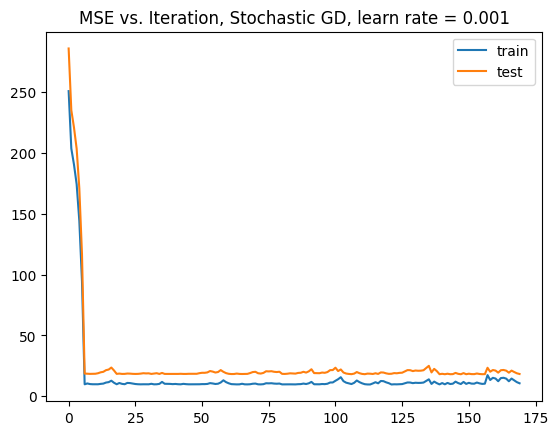

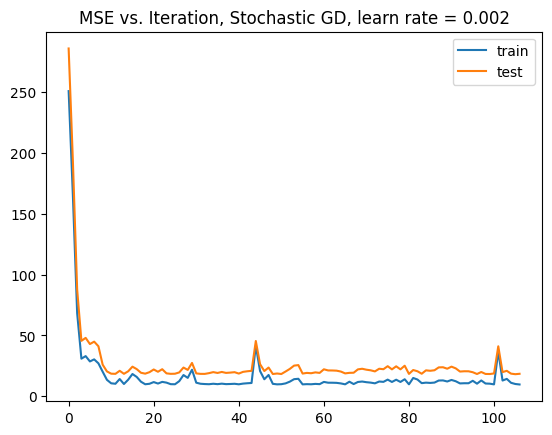

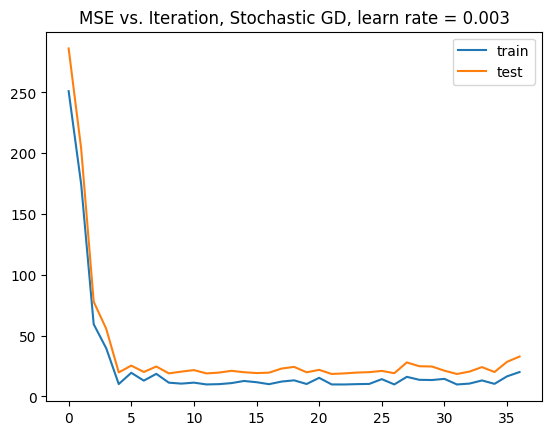

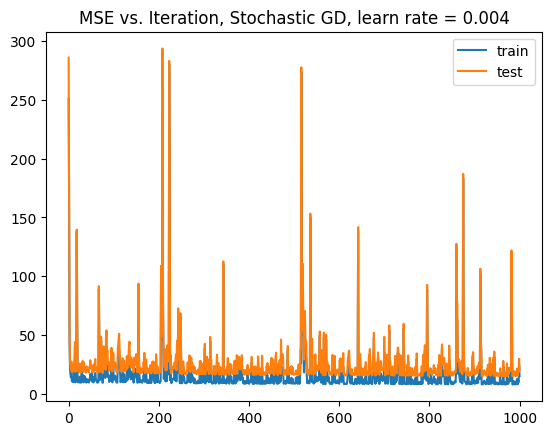

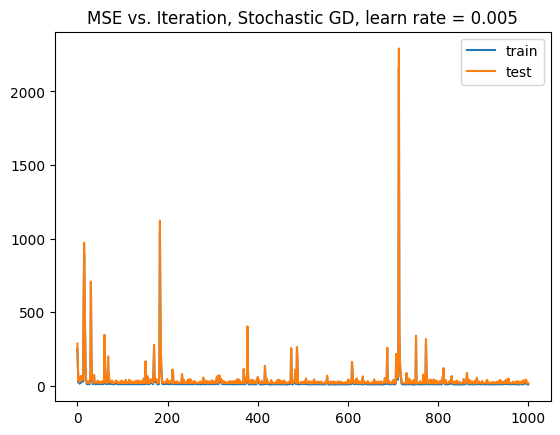

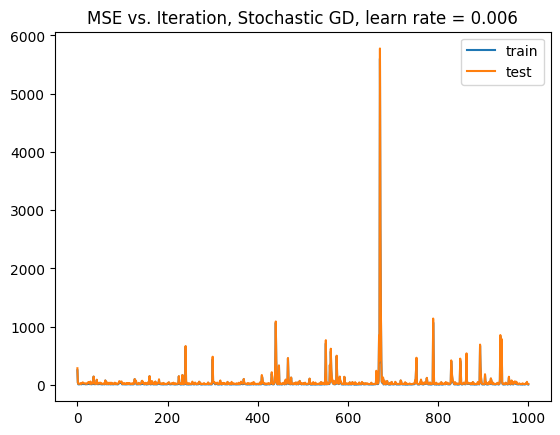

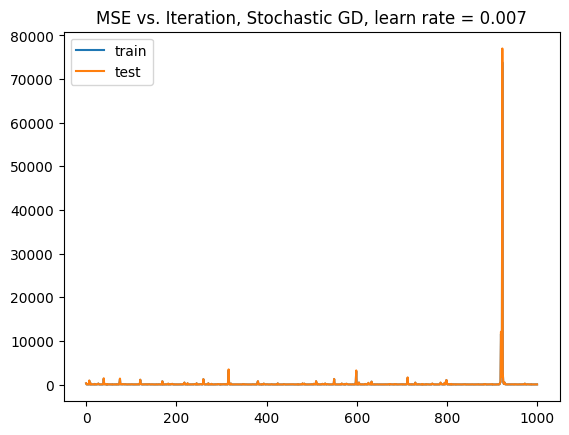

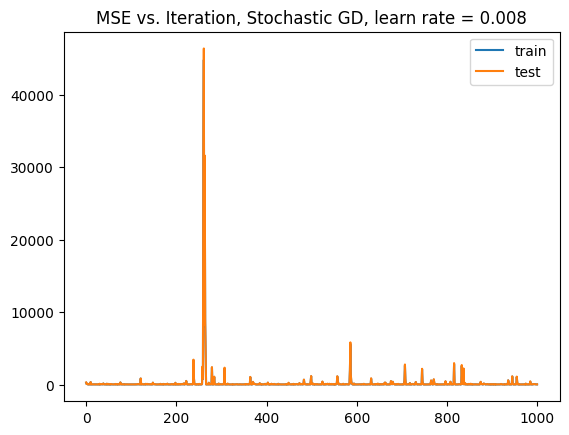

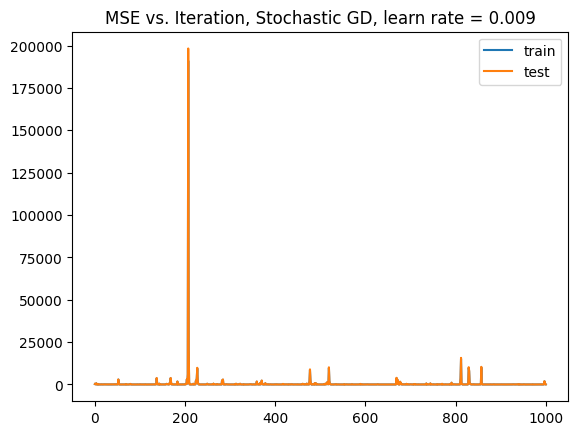

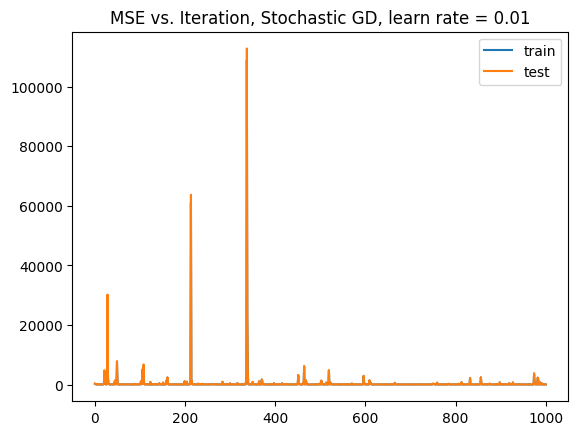

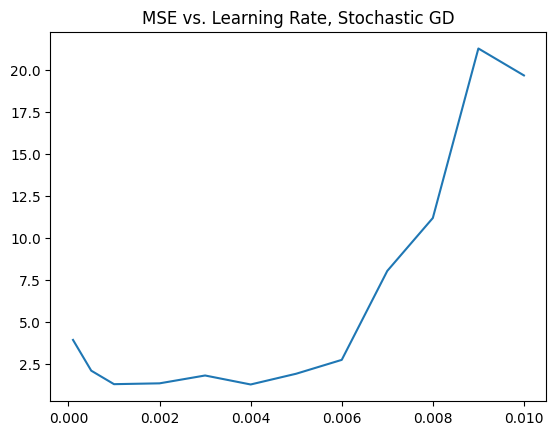

In [19]:
gd_model = gd.GradientDescent()
mse_test_s = {}

# intialize arrays for dataset as well as test/train set
X, y = df[0].to_numpy(), df[1].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

m_test, m_train = len(X_test), len(X_train)

X_train, y_train = X_train.reshape(1,m_train), y_train.reshape(1,m_train)
X_test, y_test = X_test.reshape(1,m_test), y_test.reshape(1,m_test)

rates = [0.0001, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]
start = np.random.randn(2,1)

for learn in rates:
    gd_model.learn = learn
    # stochastic GD
    s_test, s_train = gd_model.get_coeff_SGD(X_train, y_train, m_train, m_test, start, X_test, y_test)
    mse_error = np.mean(list(s_test.values()))/m_test
    mse_test_s[learn] = mse_error
    plt.plot(s_train.keys(), s_train.values(), label = 'train')
    plt.plot(s_test.keys(), s_test.values(), label = 'test')
    plt.title(f'MSE vs. Iteration, Stochastic GD, learn rate = {learn}')
    plt.legend()
    plt.show()
    
plt.plot(mse_test_s.keys(),mse_test_s.values())   
plt.title(f'MSE vs. Learning Rate, Stochastic GD')
plt.show()


# Batch GD

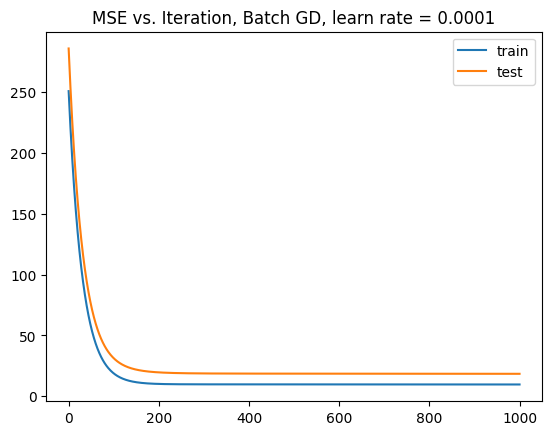

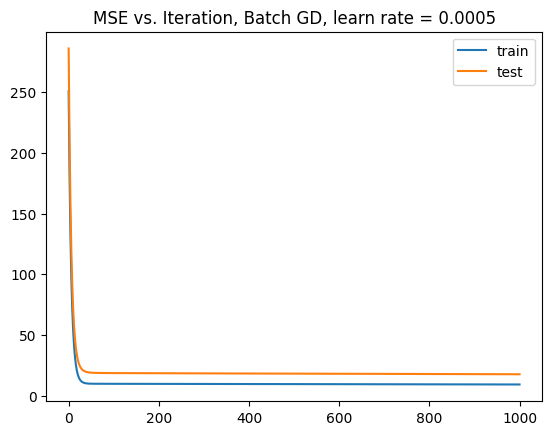

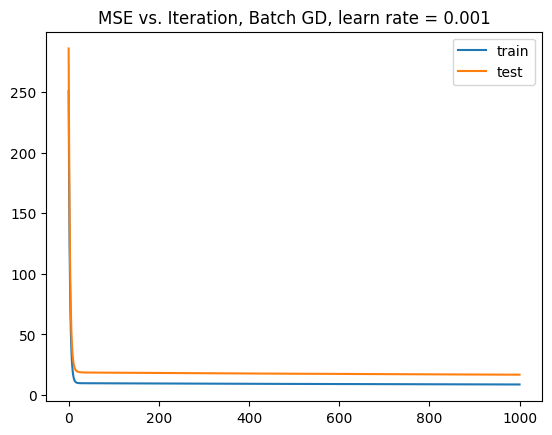

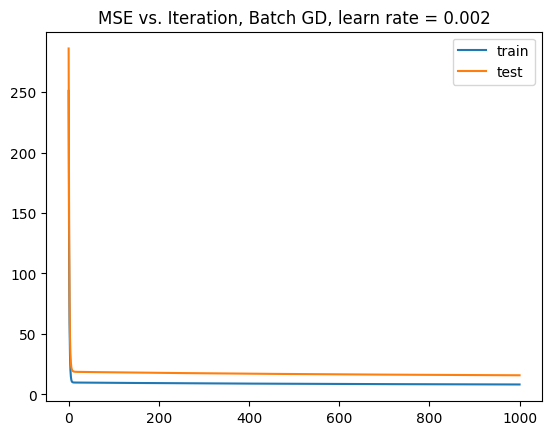

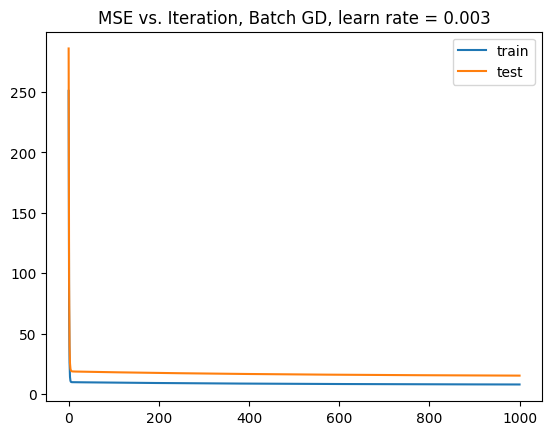

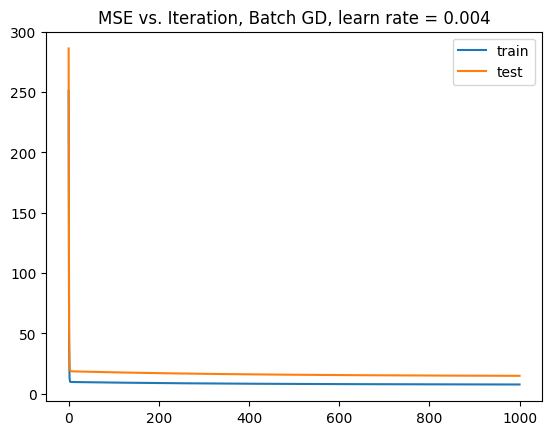

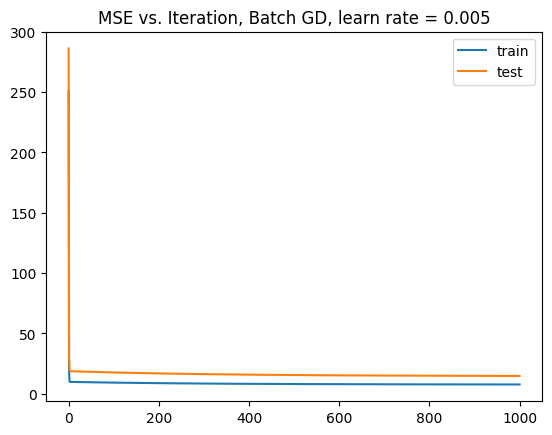

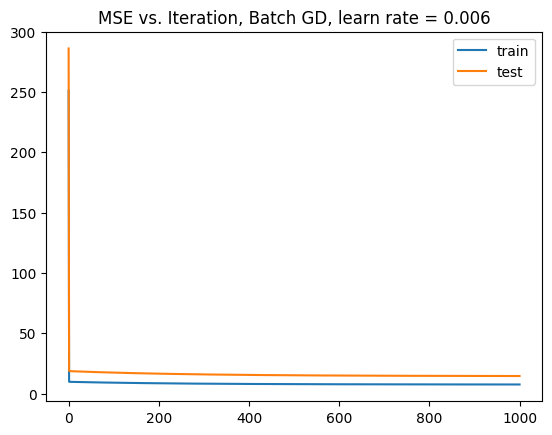

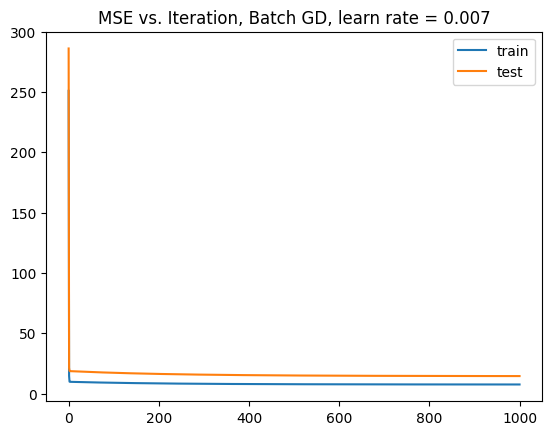

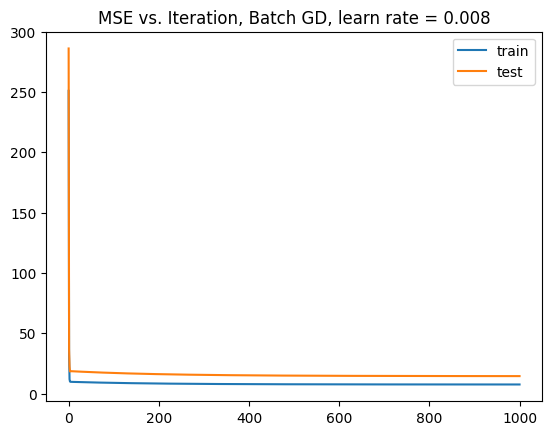

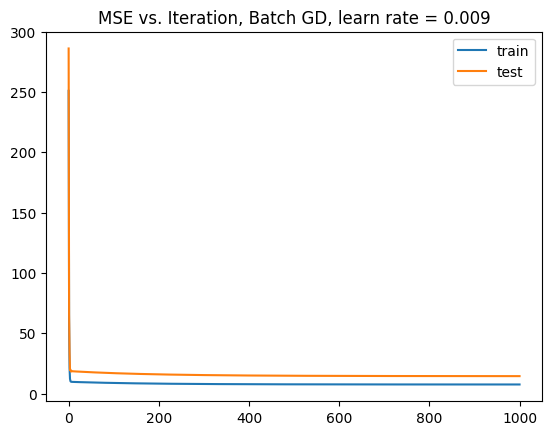

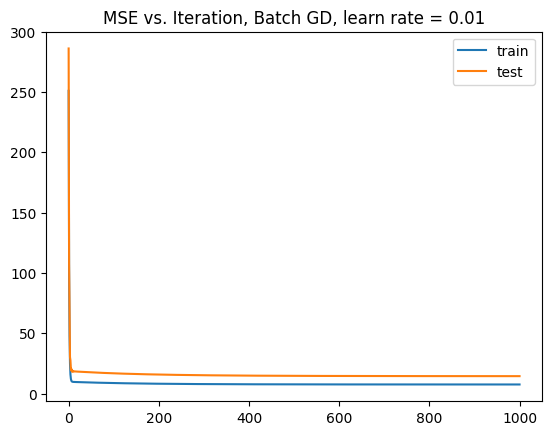

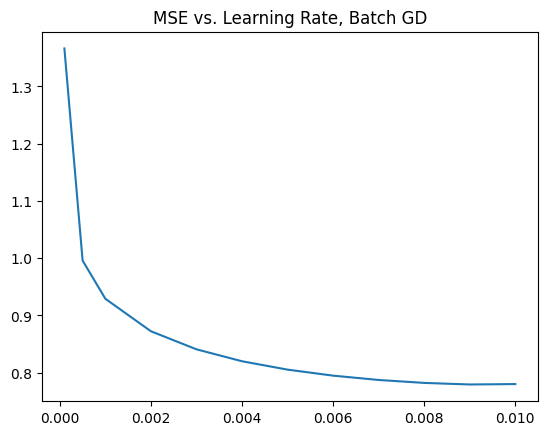

In [20]:

mse_test_b = {}
# gd_model = gd.GradientDescent()

for learn in rates:
    gd_model.learn = learn
    b_test, b_train = gd_model.get_coeff_BGD(X_train, y_train, m_train, m_test, start, X_test, y_test)
    mse_error = np.mean(list(b_test.values()))/m_test
    mse_test_b[learn] = mse_error
    plt.plot(b_train.keys(), b_train.values(), label = 'train')
    plt.plot(b_test.keys(), b_test.values(), label = 'test')
    plt.title(f'MSE vs. Iteration, Batch GD, learn rate = {learn}')
    plt.legend()
    plt.show()
    
plt.plot(mse_test_b.keys(),mse_test_b.values())   
plt.title(f'MSE vs. Learning Rate, Batch GD')
plt.show()


# Addl. Examples


Minimizing x vector: 
[-0.04519084 -7.63264645 -6.52686977]

Objective function value: 25.494875327631274

Final Hessian matrix: 
[[534.07248402   1.09511511   1.84535942]
 [  1.09511511   2.0013502    0.        ]
 [  1.84535942   0.           2.00277128]]


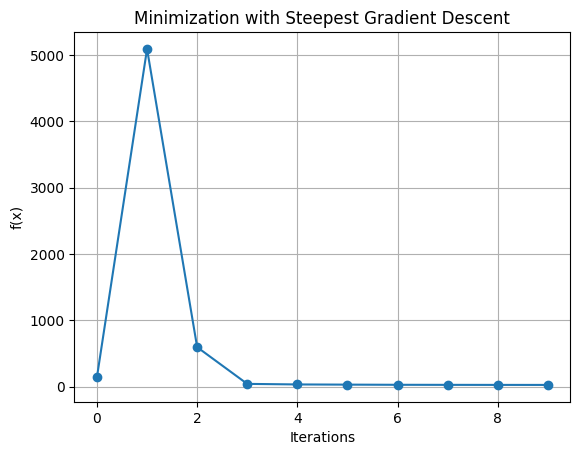

{0: np.float64(143.23608710017086),
 1: np.float64(5090.17090755164),
 2: np.float64(594.4887237082905),
 3: np.float64(41.1386615589429),
 4: np.float64(32.7141431718727),
 5: np.float64(29.918511346219848),
 6: np.float64(27.419053884970403),
 7: np.float64(26.499278153034535),
 8: np.float64(25.816677280252993),
 9: np.float64(25.494875327631274)}

In [ ]:
# Example: Steepest Descent using Newton's method
plt.close("all")
minimizer = lambda x0, x1, x2: (x0 + 5)**2 + (x1 + 8)**2 + (x2 + 7)**2 + 2 * x0**2 * (x1**2 + 2 * x2**2)
newton = gd.NewtonsDescent()
newton.steepest_descent(minimizer)

# Example: batch/stochastic GD
# filepath = os.path.join(os.path.dirname(__file__), "data", "data.txt")
# df = pd.read_csv(filepath, header = None, delimiter = ",")
# all_figs = []
# norms = NormalRegCoeffs(df)
# all_figs.extend(norms.main())
# Xg = np.random.rand(1,500)
# yg = 3*Xg + np.random.randn(1,500)*0.1
# reg = LinGD()
# eg = reg.main(Xg, yg)
# X, y = df[0].to_numpy(), df[1].to_numpy()
# rate = [0.0001, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]
# start = np.random.randn(2,1)
# modes = ["Stochastic", "Batch"]
# for mode in modes:
#     all_figs.extend(make_descent(mode, X, y, start, rate))
# plt.show()

# Discussion

## Best learning rate
Based on MSE and convergence, the best learning rate for Batch GD is 0.0001 to 0.002 and the best for Stochastic GD is 0.0001 to 0.004. Overall, SGD was able to perform better at higher learning rates than BGD, but BGD sometimes converged faster at very low learning rates.

## Accuracy on the test set

Batch GD was more accurate overall, since it considers every gradient and takes the steepest route. Stochastic GD is only using one point for estimations at each iteration, so it jumps around more in terms of error. This can be seen in the noisiness of the graphs of MSE vs iterations for stochastic GD compared to the smoother curves of batch GD.

## Speed of convergence

SGD converged faster than BGD. This is due to it randomly sampling points to take the gradient, so it can update the weights quickly and can take larger steps towards the optimal point. Since a tolerance was used as a stopping condition, in most cases SGD was able to reach values within an acceptable range faster than BGD. This makes it preferable for large datasets, or when a good estimate of the optimum value is acceptable; the reduction in accuracy can be ok since it converges faster.